# Проект. Исследование стартапов

- Автор: Мансурова Фатима
- Дата: 26.09.2025

## Введение

# Цели и задачи проекта.

Финансовая компания, работающая с венчурными инвестициями, хочет понять закономерности финансирования стартапов и оценить перспективы выхода на рынок с покупкой и развитием компаний. Для этого необходимо провести исследование на исторических данных. 

## Шаг 1. Знакомство с данными: загрузка и предобработка

Датасет получен из базы данных стартапов.

Название основного датасета — `cb_investments.zip`. Внутри архива один файл — `cb_investments.csv`.

Описание данных:
* `name` — название компании.
* `homepage_url` — ссылка на сайт компании.
* `category_list` — категории, в которых работает компания. Указываются через `|`.
* `market` — основной рынок или отрасль компании.
* `funding_total_usd` — общий объём привлечённых инвестиций в долларах США.
* `status` — текущий статус компании, например `operating`, `closed` и так далее.
* `country_code` — код страны, например USA.
* `state_code` — код штата или региона, например, CA.
* `region` — регион, например, SF Bay Area.
* `city` — город, в котором расположена компания.
* `funding_rounds` — общее число раундов финансирования.
* `participants` — число участников в раундах финансирования.
* `founded_at` — дата основания компании.
* `founded_month` — месяц основания в формате `YYYY-MM`.
* `founded_quarter` — квартал основания в формате `YYYY-QN`.
* `founded_year` — год основания.
* `first_funding_at` — дата первого финансирования.
* `mid_funding_at` — дата среднего по времени раунда финансирования.
* `last_funding_at` — дата последнего финансирования.
* `seed` — сумма инвестиций на посевной стадии.
* `venture` — сумма венчурных инвестиций.
* `equity_crowdfunding` — сумма, привлечённая через долевой краудфандинг.
* `undisclosed` — сумма финансирования нераскрытого типа.
* `convertible_note` — сумма инвестиций через конвертируемые займы.
* `debt_financing` — сумма долгового финансирования.
* `angel` — сумма инвестиций от бизнес-ангелов.
* `grant` — сумма полученных грантов.
* `private_equity` — сумма инвестиций в виде прямых (частных) вложений.
* `post_ipo_equity` — сумма финансирования после IPO.
* `post_ipo_debt` — сумма долгового финансирования после IPO.
* `secondary_market` — сумма сделок на вторичном рынке.
* `product_crowdfunding` — сумма, привлечённая через продуктовый краудфандинг.
* `round_A` — `round_H` — сумма инвестиций в соответствующем раунде.

Название дополнительного датасета — `cb_returns.csv`. Он содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

Описание данных:
* `year` — год возврата средств.
* `seed` — сумма возвратов от посевных инвестиций.
* `venture` — сумма возвратов от венчурных инвестиций.
* `equity_crowdfunding` — сумма, возвращённая по долевому краудфандингу.
* `undisclosed` — сумма возвратов нераскрытого типа.
* `convertible_note` — сумма возвратов через конвертируемые займы.
* `debt_financing` — сумма возвратов от долгового финансирования.
* `angel` — сумма возвратов бизнес-ангелам.
* `grant` — сумма возвратов по грантам.
* `private_equity` — сумма возвратов прямых (частных) вложений.
* `post_ipo_equity` — сумма возвратов от IPO.
* `post_ipo_debt` — сумма возвратов от долгового IPO.
* `secondary_market` — сумма возвратов от сделок на вторичном рынке.
* `product_crowdfunding` — сумма возвратов по продуктовому краудфандингу.

Файлы находятся в папке `datasets`, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации

Загрузите необходимые для работы библиотеки.

Совет: если вы неоднократно используете какой-либо код, вынесите его в начало проекта в виде функций.

In [1]:
!pip install phik -U
from phik import phik_matrix

     |████████████████████████████████| 677 kB 1.5 MB/s eta 0:00:01


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import numpy as pn
from matplotlib.patches import Patch

Загрузите все данные по проекту.

Совет: данные из zip-архива можно загрузить следующим кодом:

`df = pd.read_csv("https://code.s3.yandex.net/datasets/cb_investments.zip", sep=';', low_memory=False)`

In [4]:
# Загрузка основного датасета из архива
url_investments = "https://code.s3.yandex.net/datasets/cb_investments.zip"
df = pd.read_csv(url_investments, sep=';', low_memory=False)

# Загрузка дополнительного датасета с возвратами
url_returns = "https://code.s3.yandex.net/datasets/cb_returns.csv"
cb_returns_df = pd.read_csv(url_returns)

# Проверим первые строки для подтверждения успешной загрузки
display("Основной датасет (cb_investments.csv):")
display(df.info())
display(df.head())
display("\nДатасет с возвратами (cb_returns.csv):")
display(cb_returns_df.info())
display(cb_returns_df.head())

'Основной датасет (cb_investments.csv):'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

None

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'\nДатасет с возвратами (cb_returns.csv):'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  15 non-null     int64  
 1   seed                  15 non-null     float64
 2   venture               15 non-null     float64
 3   equity_crowdfunding   15 non-null     float64
 4   undisclosed           15 non-null     float64
 5   convertible_note      15 non-null     float64
 6   debt_financing        15 non-null     float64
 7   angel                 15 non-null     float64
 8   grant                 15 non-null     float64
 9   private_equity        15 non-null     float64
 10  post_ipo_equity       15 non-null     float64
 11  post_ipo_debt         15 non-null     float64
 12  secondary_market      15 non-null     float64
 13  product_crowdfunding  15 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.8 KB


None

,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
1,2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2,2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
3,2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
4,2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


Выведите информацию, которая необходима для принятия решений о предобработке.

Сделайте вывод о полученных данных: каков их объём, соответствуют ли данные описанию, есть ли пропущенные значения, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

# 1.2. Предобработка данных

Проверьте названия столбцов в датасетах: все ли они точно отражают содержимое данных и оформлены в удобном для работы стиле. При необходимости приведите их к единому аккуратному стилю.

In [5]:
# Исправляем названия столбцов основного датасета:

# Убираем пробелы в начале и конце названий
df.columns = df.columns.str.strip()

# Опционально, можно привести все названия к нижнему регистру (уже выполнено)
df.columns = df.columns.str.lower()
# Пример приведения названий столбцов к snake_case
df.columns = [col.strip().lower().replace(' ', '_').replace('-', '_') for col in df.columns]
# Выводим обновленные названия
display(df.columns)

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'participants', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_a', 'round_b',
       'round_c', 'round_d', 'round_e', 'round_f', 'round_g', 'round_h'],
      dtype='object')

Уберите в столбце `funding_total_usd` выделение разрядов и приведите его к числовому типу.

In [6]:
df['funding_total_usd'] = df['funding_total_usd'].str.replace(',', '', regex=False)

In [7]:
# Убираем пробелы в названиях столбцов (если этого еще не сделали)
df.columns = df.columns.str.strip()

# Убираем из funding_total_usd все символы, которые мешают преобразованию в число
# Например, запятые, пробелы, и др.
df['funding_total_usd'] = df['funding_total_usd'].str.replace(r'[^\d.]', '', regex=True)

# Преобразуем в числовой тип (float), ошибки конвертации будут заменены на NaN
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

# Проверим результат
print(df['funding_total_usd'].head())
print(df['funding_total_usd'].dtype)

0    90000000.0
1     2000000.0
2     9000000.0
3     7700000.0
4      540000.0
Name: funding_total_usd, dtype: float64
float64


In [8]:
df['market']=df['market'].str.strip()

Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

In [9]:
# Преобразование дат к datetime
date_cols = ['founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Преобразование founded_month в период с месячной частотой
if 'founded_month' in df.columns:
    # Если формат YYYY-MM в строках, то:
    df['founded_month'] = pd.to_datetime(df['founded_month'], errors='coerce').dt.to_period('M')

# Преобразование founded_quarter в период с квартальной частотой
if 'founded_quarter' in df.columns:
    # Пример формата: '2023-Q1'
    # Для преобразования можно заменить Qn на Qn (Period любит такой формат)
    df['founded_quarter'] = df['founded_quarter'].apply(lambda x: str(x).replace('-', ''))
    df['founded_quarter'] = pd.to_datetime(df['founded_quarter'], format='%YQ%q', errors='coerce').dt.to_period('Q')

# Преобразование founded_year и year в целочисленные (int)
for col in ['founded_year']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')  # Int64 позволяет NaN значения

# Проверка результатов
display(df.dtypes[['founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at', 'last_funding_at']])

founded_at          datetime64[ns]
founded_month            period[M]
founded_quarter      period[Q-DEC]
founded_year                 Int64
first_funding_at    datetime64[ns]
mid_funding_at      datetime64[ns]
last_funding_at     datetime64[ns]
dtype: object

В датасете `cb_returns` сделайте столбец `year` индексом всего датасета, если не делали это при загрузке.

In [10]:
# Сделаем столбец 'year' индексом (если еще не сделано)
if cb_returns_df.index.name != 'year':
    cb_returns_df = cb_returns_df.set_index('year')

# Проверка
display(cb_returns_df.index.name)
display(cb_returns_df.head())

'year'

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


Обработайте текстовые данные, если это необходимо. Пропуски в текстовых столбцах заполните заглушками там, где это понадобится.

In [11]:
# Выделяем текстовые столбцы
text_cols = df.select_dtypes(include=['object']).columns.tolist()

# Для каждого текстового столбца заполняем пропуски
for col in text_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna('unknown')

# Проверим результаты
print(df[text_cols].isnull().sum())

name             0
homepage_url     0
category_list    0
market           0
status           0
country_code     0
state_code       0
region           0
city             0
dtype: int64


In [12]:
text_cols_returns = cb_returns_df.select_dtypes(include=['object']).columns.tolist()

for col in text_cols_returns:
    if cb_returns_df[col].isnull().any():
        cb_returns_df[col] = cb_returns_df[col].fillna('unknown')

display(cb_returns_df[text_cols_returns].isnull().sum())

Series([], dtype: float64)

Обработайте полные дубликаты в данных и пропуски в `funding_total_usd`. избавьтесь от тех строк, которые не несут какой-либо информации либо не содержат данных о финансировании.

In [13]:
# 1. Удаляем полные дубликаты
df = df.drop_duplicates()

# Обработка столбца funding_total_usd
df.loc[:, 'funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

# Удаление строк с NaN и 0
df = df[(df['funding_total_usd'].notna()) & (df['funding_total_usd'] != 0)]

# Остальная обработка
min_non_null = 2
df = df[df.notnull().sum(axis=1) >= min_non_null]

print(f"Оставшиеся строки: {len(df)}")

Оставшиеся строки: 40907


Заполните пропуски в значениях `mid_funding_at` на основании значений в столбцах `first_funding_at` и `last_funding_at`. В качестве нового значения вместо пропусков возьмите приблизительно середину интервала между этими двумя датами.

Оцените размер оставшихся пропусков в столбце.

In [14]:
def fill_mid_funding(row):
    if pd.isna(row['mid_funding_at']):
        if pd.notna(row['first_funding_at']) and pd.notna(row['last_funding_at']):
            delta = row['last_funding_at'] - row['first_funding_at']
            return row['first_funding_at'] + delta / 2
    return row['mid_funding_at']

df['mid_funding_at'] = df.apply(fill_mid_funding, axis=1)

missing_count = df['mid_funding_at'].isna().sum()
total_count = len(df)

print(f"Оставшиеся пропуски в 'mid_funding_at': {missing_count} из {total_count} ({missing_count / total_count:.2%})")

Оставшиеся пропуски в 'mid_funding_at': 1 из 40907 (0.00%)


Оцените полноту данных и сделайте предварительный вывод о том, достаточно ли данных для решения задач проекта. Какой процент данных был отброшен?

In [15]:
initial_count = 54294
current_count = 40907
removed_count = initial_count - current_count  # 13387
removed_percent = removed_count / initial_count * 100  # ~24.67%

In [16]:
# Приведение дат к datetime
date_columns = ['founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Текущая дата для сравнения
current_date = pd.to_datetime('today')

# 1. Проверка минимальных/максимальных значений дат и столбца founded_year
display("Дата основания - минимальная:", df['founded_at'].min())
display("Дата основания - максимальная:", df['founded_at'].max())
display("Год основания - минимальный:", df['founded_year'].min())
display("Год основания - максимальный:", df['founded_year'].max())

# 2. Найдем записи с «ненормальными» датами основания
# Объявим разумные границы: 1980 <= founded_year <= текущий год
valid_year_start = 1980
valid_year_end = current_date.year

anom_founded = df[(df['founded_year'] < valid_year_start) | (df['founded_year'] > valid_year_end)]

display(f"Число компаний с аномальным годом основания (до {valid_year_start} или после {valid_year_end}): {len(anom_founded)}")
display(anom_founded[['name', 'founded_year', 'founded_at']])

# 3. Проверка логики дат финансирования

# Условие: first_funding_at >= founded_at (если обе даты не пустые)
anom_funding_dates = df[
    (df['first_funding_at'].notna()) & (df['founded_at'].notna()) &
    (df['first_funding_at'] < df['founded_at'])
]

display(f"Число компаний, у которых первый раунд финансирования раньше даты основания: {len(anom_funding_dates)}")
display(anom_funding_dates[['name', 'founded_at', 'first_funding_at']])

# 4. Проверить даты, выходящие за пределы текущей даты (не должно быть раундов в будущем)

anom_future_funding = df[
    ((df['first_funding_at'] > current_date) |
     (df['mid_funding_at'] > current_date) |
     (df['last_funding_at'] > current_date))
]

display(f"Компании с будущей датой финансирования: {len(anom_future_funding)}")
display(anom_future_funding[['name', 'first_funding_at', 'mid_funding_at', 'last_funding_at']])

# 5. Итог: отметить аномальные компании в отдельный датасет или метку для последующего исключения
df['anomaly_flag'] = False
df.loc[anom_founded.index, 'anomaly_flag'] = True
df.loc[anom_funding_dates.index, 'anomaly_flag'] = True
df.loc[anom_future_funding.index, 'anomaly_flag'] = True

display(f"Общее число компаний с аномалиями по датам: {df['anomaly_flag'].sum()}")

'Дата основания - минимальная:'

Timestamp('1785-01-01 00:00:00')

'Дата основания - максимальная:'

Timestamp('2014-12-13 00:00:00')

'Год основания - минимальный:'

1636

'Год основания - максимальный:'

2014

'Число компаний с аномальным годом основания (до 1980 или после 2026): 367'

,name,founded_year,founded_at
0,Harvard University,1636,NaT
1,University of New Brunswick,1785,1785-01-01
2,DuPont,1802,1802-07-19
3,University of Michigan,1817,1817-01-01
4,Case Western Reserve University,1826,1826-01-01
...,...,...,...
444,Amplion Clinical Communications,1979,1979-01-01
445,MGT Capital Investments,1979,1979-01-01
446,STI Technologies,1979,1979-01-01
447,Galloway Realty,1979,1979-01-01


'Число компаний, у которых первый раунд финансирования раньше даты основания: 2129'

,name,founded_at,first_funding_at
693,Morcom International,1984-08-12,1984-01-01
1489,JAD Tech Consulting,1993-09-27,1993-09-23
1493,Market Wire,1994-01-01,1990-11-30
1874,GeoCities,1996-01-01,1995-01-01
2149,Ask.com,1996-04-01,1996-01-01
...,...,...,...
38527,"Almond Systems, Inc.",2014-10-10,2014-10-07
38531,Droppie,2014-10-17,2014-09-04
38534,The Viridan Group,2014-10-21,2014-10-20
38551,Manifatto,2014-11-26,2014-09-24


'Компании с будущей датой финансирования: 0'

,name,first_funding_at,mid_funding_at,last_funding_at


'Общее число компаний с аномалиями по датам: 2496'

## Шаг 2. Инжиниринг признаков

При выполнении заданий не забывайте интерпретировать полученные результаты и делать промежуточные выводы.

### 2.1. Группы по срокам финансирования

Разделите все компании на три группы:

* Единичное финансирование — был всего один раунд финансирования.

* Срок финансирования до года — между первым и последним раундом финансирования прошло не более года.

* Срок финансирования более года.

Визуализируйте соотношение этих групп, создав два графика:

* По количеству компаний: Покажите, какой процент от общего числа компаний относится к каждой из трёх групп.
* По объёму инвестиций: Отобразите, какую долю от общего объёма привлечённых средств получила каждая группа.

Совет: Для ясности и согласованности используйте единую цветовую палитру для всех графиков, чтобы каждая категория (например, «Единичное финансирование») всегда отображалась одним цветом.

In [17]:
# Преобразуем даты в datetime (если ещё не сделано)
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')

# Создаем столбец с разницей в днях между первым и последним финансированием
df['funding_period_days'] = (df['last_funding_at'] - df['first_funding_at']).dt.days

# Функция для присвоения группы
def assign_group(row):
    if row['funding_rounds'] == 1:
        return 'Единичное финансирование'
    elif pd.notna(row['funding_period_days']):
        if row['funding_period_days'] <= 365:
            return 'Срок финансирования до года'
        else:
            return 'Срок финансирования более года'
    else:
        return 'Неизвестно'

# Применяем функцию к датафрейму
df['funding_group'] = df.apply(assign_group, axis=1)

# Проверим количество компаний в каждой группе
print(df['funding_group'].value_counts())

Единичное финансирование          24113
Срок финансирования более года    12291
Срок финансирования до года        4501
Неизвестно                            2
Name: funding_group, dtype: int64


In [18]:
# Удаляем пробелы в начале и конце имени каждого столбца
df.columns = df.columns.str.strip()

# Проверяем результат
print(df.columns)

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'participants', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_a', 'round_b',
       'round_c', 'round_d', 'round_e', 'round_f', 'round_g', 'round_h',
       'anomaly_flag', 'funding_period_days', 'funding_group'],
      dtype='object')


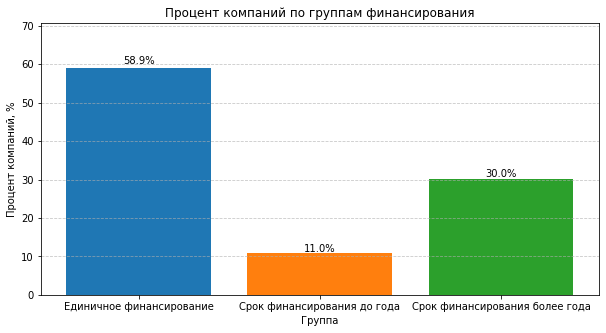

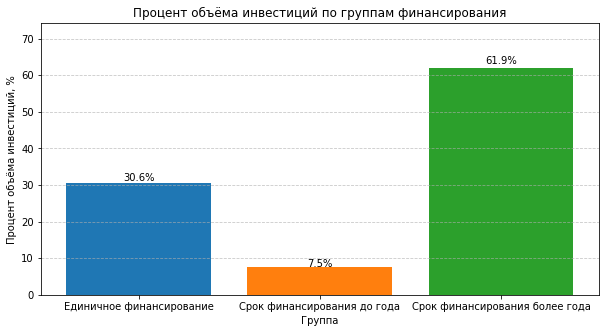

In [19]:
# Маска для строк с ненулевыми данными по финансированию
mask = df['funding_total_usd'].notna()

# Подсчёт количества компаний в каждой группе и вычисление % доли
count_by_group = df['funding_group'].value_counts()
percent_by_group = count_by_group / count_by_group.sum() * 100

# Подсчёт суммы инвестиций в каждой группе и вычисление % доли
sum_by_group = df.loc[mask].groupby('funding_group')['funding_total_usd'].sum()
percent_sum_by_group = sum_by_group / sum_by_group.sum() * 100

# Упорядочим группы по заданному порядку и заполним отсутствующие группы нулями
groups_order = ['Единичное финансирование', 'Срок финансирования до года', 'Срок финансирования более года']

percent_by_group = percent_by_group.reindex(groups_order).fillna(0)
percent_sum_by_group = percent_sum_by_group.reindex(groups_order).fillna(0)

# Цветовая палитра: связываем цвет с группой
palette = {
    'Единичное финансирование': '#1f77b4',  # синий
    'Срок финансирования до года': '#ff7f0e',  # оранжевый
    'Срок финансирования более года': '#2ca02c',  # зелёный
}

def get_colors(index):
    return [palette.get(x, '#7f7f7f') for x in index]

# График 1: % компаний в каждой группе
plt.figure(figsize=(10, 5))
bars1 = plt.bar(percent_by_group.index, percent_by_group.values, color=get_colors(percent_by_group.index))
plt.title('Процент компаний по группам финансирования')
plt.ylabel('Процент компаний, %')
plt.xlabel('Группа')
plt.ylim(0, max(percent_by_group.values)*1.2)
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 1.02, f'{height:.1f}%', ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# График 2: % объёма финансирования по группам
plt.figure(figsize=(10, 5))
bars2 = plt.bar(percent_sum_by_group.index, percent_sum_by_group.values, color=get_colors(percent_sum_by_group.index))
plt.title('Процент объёма инвестиций по группам финансирования')
plt.ylabel('Процент объёма инвестиций, %')
plt.xlabel('Группа')
plt.ylim(0, max(percent_sum_by_group.values)*1.2)
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 1.02, f'{height:.1f}%', ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### 2.2 Выделение средних и нишевых сегментов рынка

Компании указывают свой сегмент рынка в столбце `market`. Рассчитайте, как часто в датасете встречается каждый из сегментов. Сегменты, к которым относится более 120 компаний, отнесите к массовым, сегменты, в которые входит от 35 до 120 включительно, отнесите к средним, а сегменты до 35 компаний отнесите к нишевым. Рассчитайте, сколько сегментов попадает в каждую из категорий.

Постройте график распределения количества компаний в сегментах и отобразите на нём разделение на нишевые и средние сегменты.

289 нишевых сегментов
57 средних сегментов
49 массовых сегментов


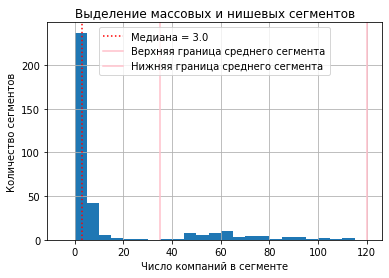

In [20]:
market_counts = df['market'].value_counts()
median = market_counts.median()
niche_th, mass_th = 35, 120
niche_markets = market_counts < niche_th
mass_markets = market_counts >= mass_th
n = df['market'].nunique()

niche_n = niche_markets.sum().item()
mass_n = mass_markets.sum().item()
print(f'{niche_n} нишевых сегментов')
print(f'{n - mass_n - niche_n} средних сегментов')
print(f'{mass_n} массовых сегментов')

ax = market_counts.hist(bins=range(-5,125,5))

plt.axvline(market_counts.median(),label=f'Медиана = {median:.1f}', color='red',ls=':')

plt.axvline(mass_th, color='pink', label=f'Верхняя граница среднего сегмента')
plt.axvline(niche_th, color='pink', label=f'Нижняя граница среднего сегмента')
ax.set(
    title="Выделение массовых и нишевых сегментов",
    xlabel="Число компаний в сегменте",
    ylabel="Количество сегментов"
)
plt.legend();

In [21]:
df[df['market'].str.contains(r'^\s*Software\s*$', na=False)][['market']].value_counts()

market  
Software    4812
dtype: int64

Количество сегментов в каждой категории:
Нишевые     289
Средние      57
Массовые     49
Name: market, dtype: int64


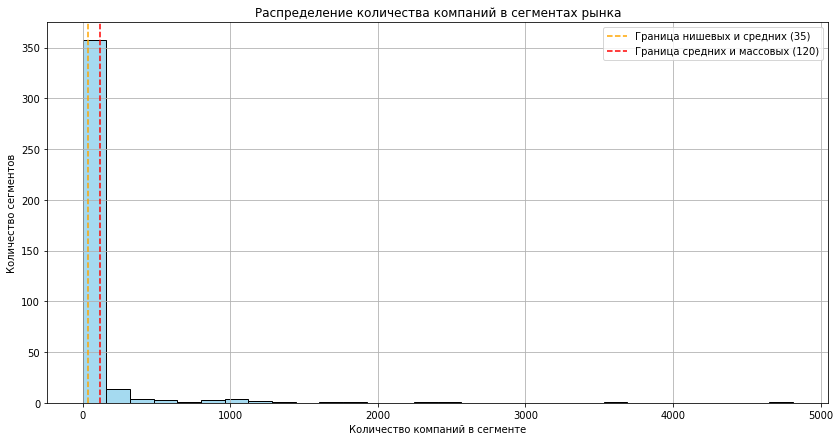

In [22]:
# 1. Подсчёт количества компаний в каждом сегменте
segment_counts = df['market'].value_counts()

# 2. Классификация сегментов по количеству компаний
def classify_segment(count):
    if count > 120:
        return 'Массовые'
    elif 35 <= count <= 120:
        return 'Средние'
    else:
        return 'Нишевые'

segment_categories = segment_counts.apply(classify_segment)

# 3. Подсчёт количества сегментов в каждой категории
category_counts = segment_categories.value_counts()

print("Количество сегментов в каждой категории:")
print(category_counts)

# 4. Построение графика распределения количества компаний в сегментах

plt.figure(figsize=(14,7))

# Строим гистограмму количества компаний в сегментах
sns.histplot(segment_counts, bins=30, kde=False, color='skyblue')

plt.xlabel('Количество компаний в сегменте')
plt.ylabel('Количество сегментов')
plt.title('Распределение количества компаний в сегментах рынка')

# Отметим границы между нишевыми, средними и массовыми сегментами
plt.axvline(x=35, color='orange', linestyle='--', label='Граница нишевых и средних (35)')
plt.axvline(x=120, color='red', linestyle='--', label='Граница средних и массовых (120)')

plt.legend()
plt.grid(True)
plt.show()

Оставьте в столбце `market` только массовые сегменты. Для остальных сегментов замените значения на заглушки — `niche` для нишевых и `mid` для средних.

Дальнейшие исследования выполняйте с учётом этой замены. Индивидуальные сегменты внутри средней и нишевой групп рассматривать не нужно — они объединяются в два общих сегмента.


In [23]:
# Для удобства создадим словарь с категорией сегмента для каждого названия сегмента
segment_category_dict = segment_counts.apply(classify_segment).to_dict()

def replace_segment_name(market_name):
    category = segment_category_dict.get(market_name)
    if category == 'Массовые':
        return market_name            # Оставляем как есть
    elif category == 'Средние':
        return 'mid'                 # Замена на 'mid' для средних сегментов
    else:
        return 'niche'               # Замена на 'niche' для нишевых сегментов

# Применяем замену к столбцу market
df['market'] = df['market'].apply(replace_segment_name)

# Проверяем итог: сколько уникальных значений осталось
display("Уникальные значения в 'market' после замены:", df['market'].unique())

"Уникальные значения в 'market' после замены:"

array(['Education', 'unknown', 'mid', 'Social Media',
       'Hardware + Software', 'Biotechnology', 'Hospitality',
       'Enterprise Software', 'Manufacturing', 'Finance', 'Design',
       'niche', 'Nonprofits', 'Software', 'Curated Web', 'Health Care',
       'Health and Wellness', 'Clean Technology', 'Web Hosting',
       'E-Commerce', 'Automotive', 'Medical', 'Fashion', 'Security',
       'Networking', 'Analytics', 'Semiconductors', 'Public Relations',
       'Travel', 'Consulting', 'Real Estate', 'Technology', 'Music',
       'Advertising', 'Games', 'Mobile', 'Internet', 'Sports',
       'Photography', 'News', 'Search', 'Messaging', 'Video',
       'Marketplaces', 'Entertainment', 'SaaS', 'Cloud Computing',
       'Big Data', 'Apps', 'Social Network Media', 'Startups'],
      dtype=object)

## Шаг 3. Работа с выбросами и анализ

### 3.1. Анализируем и помечаем выбросы в каждом из сегментов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

По предобработанному столбцу `funding_total_usd` графическим образом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся. Укажите интервал, в котором лежат типичные значения.

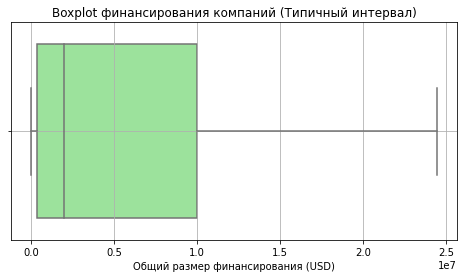

Типичный интервал (границы усов boxplot): [-14125000.00, 24475000.00] USD
Значения вне этого диапазона считаются выбросами (аномально большими или малыми).


In [24]:


# Предобработка данных: убрать пропуски и нули
funding_data = df['funding_total_usd'].dropna()
funding_data = funding_data[funding_data > 0]

# Построим boxplot без отображения выбросов
plt.figure(figsize=(8, 4))
sns.boxplot(x=funding_data, showfliers=False, color='lightgreen')
plt.xlabel('Общий размер финансирования (USD)')
plt.title('Boxplot финансирования компаний (Типичный интервал)')

plt.grid(True)
plt.show()

# Рассчитаем границы усов boxplot
Q1 = funding_data.quantile(0.25)
Q3 = funding_data.quantile(0.75)
IQR = Q3 - Q1

# Обычно "усы" доходят до границ [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(f"Типичный интервал (границы усов boxplot): [{lower_whisker:.2f}, {upper_whisker:.2f}] USD")
print("Значения вне этого диапазона считаются выбросами (аномально большими или малыми).")

Определите компании с аномальным объёмом общего финансирования — используйте метод IQR отдельно по каждому сегменту. Напомним, что все нишевые сегменты должны быть объединены в одну группу, а средние — в другую.

Определите сегменты рынка с наибольшей долей компаний, получивших аномальное финансирование, и выведите топ таких сегментов.

In [25]:

# Создадим функцию для классификации сегмента
def classify_segment(segment_name):
    # выделим нишевые и средние по условиям
    if segment_name in список_нишевых_сегментов:
        return 'niche'
    elif segment_name in список_средних_сегментов:
        return 'mid'
    else:
        return segment_name  # массовые сегменты оставить как есть

# Предположим, что список нишевых и средних сегментов заранее известен или можно определить по количеству
# Для этого можно использовать ранее полученные категории по численности компаний

# Для начала (если есть только один столбец 'market'), сделаем классификацию (категориальную, иначе по численности)

# Вариант: создадим группы на основе ранее подсчитанных категорий
# Вариант: группируем по 'market' и далее классифицируем

# 1) Определить количество компаний в каждом сегменте
segment_counts = df['market'].value_counts()

# 2) Классифировать сегменты по численности
def categorize_segment(count):
    if count > 120:
        return 'mass'
    elif 35 <= count <= 120:
        return 'mid_group'
    else:
        return 'niche_group'

segment_category = segment_counts.apply(categorize_segment).to_dict()

# 3) Создадим колонку с группами для каждой компании
df['segment_group'] = df['market'].map(segment_category)

# 4) Расчёт границ аномалии по каждой группе
anom_companies = pd.DataFrame()

for group in ['mass', 'mid_group', 'niche_group']:
    group_df = df[df['segment_group'] == group]
    Q1 = group_df['funding_total_usd'].quantile(0.25)
    Q3 = group_df['funding_total_usd'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Определяем аномальные компании
    mask = (group_df['funding_total_usd'] < lower_bound) | (group_df['funding_total_usd'] > upper_bound)
    anomalies = group_df[mask].copy()
    anomalies['anomaly'] = True
    
    anom_companies = pd.concat([anom_companies, anomalies])

# 5. Подсчёт доли аномальных компаний по сегментам рынка
# Для этого сгруппируем по 'market'
total_counts = df['market'].value_counts()
anomaly_counts = anom_companies['market'].value_counts()

# Создадим DataFrame для анализа
df_summary = pd.DataFrame({
    'total': total_counts,
    'anomalies': anomaly_counts
}).fillna(0)

df_summary['share_anomaly'] = df_summary['anomalies'] / df_summary['total']

# 6. Топ сегментов по доле компаний с аномалией
top_segments = df_summary.sort_values('share_anomaly', ascending=False).head(10)

print(top_segments)

                     total  anomalies  share_anomaly
Semiconductors         484        156       0.322314
Clean Technology      1180        326       0.276271
Health Care           1185        320       0.270042
Web Hosting            424        111       0.261792
Technology             238         59       0.247899
Biotechnology         3590        828       0.230641
Security               567         97       0.171076
Cloud Computing        152         25       0.164474
Enterprise Software   1381        222       0.160753
Finance                828        127       0.153382


In [26]:
# 2. Подсчет количества компаний по сегментам
segment_counts = df['market'].value_counts()

# 3. Создаем функцию для классификации сегментов по численности
def classify_segment_size(count):
    if count > 120:
        return 'mass'   # массовые
    elif 35 <= count <= 120:
        return 'mid'    # средние
    else:
        return 'niche'  # нишевые

# 4. Создаем словарь — название сегмента: категория ('mass', 'mid', 'niche')
segment_size_category = segment_counts.apply(classify_segment_size).to_dict()

# 5. Создаем колонку с группами: нишевые в 'niche', средние в 'mid', массовые в 'mass'
df['segment_group'] = df['market'].map(segment_size_category)

# 6. Для каждой группы находим аномальные компании по IQR
# Для каждой группы находим аномальные компании по IQR
anomaly_list = []

for group in ['mass', 'mid', 'niche']:
    group_df = df[df['segment_group'] == group]

    Q1 = group_df['funding_total_usd'].quantile(0.25)
    Q3 = group_df['funding_total_usd'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    anomalies_mask = (group_df['funding_total_usd'] < lower_bound) | (group_df['funding_total_usd'] > upper_bound)
    anomalies = group_df[anomalies_mask]
    anomaly_list.append(anomalies)

# Объединим все аномальные компании
anomalies_df = pd.concat(anomaly_list)
# 7. Подсчет доли аномальных компаний по сегментам
total_companies = df['market'].value_counts()
anomaly_companies = anomalies_df['market'].value_counts()

# Объединяем в DataFrame
summary = pd.DataFrame({
    'total': total_companies,
    'anomalies': anomaly_companies
}).fillna(0)

summary['share_anomaly'] = summary['anomalies'] / summary['total']

# 8. Топ сегментов по доле аномалий
top_segments = summary.sort_values('share_anomaly', ascending=False).head(10)

print("Топ сегментов по доле аномальных компаний:")
print(top_segments)

Топ сегментов по доле аномальных компаний:
                     total  anomalies  share_anomaly
Semiconductors         484        156       0.322314
Clean Technology      1180        326       0.276271
Health Care           1185        320       0.270042
Web Hosting            424        111       0.261792
Technology             238         59       0.247899
Biotechnology         3590        828       0.230641
Security               567         97       0.171076
Cloud Computing        152         25       0.164474
Enterprise Software   1381        222       0.160753
Finance                828        127       0.153382


### 3.2 Определяем границы рассматриваемого периода, отбрасываем аномалии

Проверьте по датасету, можно ли считать, что вам предоставили полные данные за 2014 год. Затем исключите из датасета компании, которые вы ранее посчитали получившими аномальное финансирование.

Когда исключите аномальные записи, на основе столбцов `mid_funding_at` и `funding_rounds` оставьте в датасете данные только об определённых компаниях. Они должны были получать финансирование в годы, когда было зафиксировано 50 или более раундов финансирования.

In [27]:
# Нужно проверить, охватываются ли все месяцы и/или кварталы 2014 года.Посчитать количество записей с датой финансирования в 2014 году, и проверить, есть ли явные пропуски по месяцам.Пример проверки полноты по году и месяцу в столбце first_funding_at:
# Преобразуем колонку с датой в datetime
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')

# Отфильтруем данные за 2014 год
df_2014 = df[df['first_funding_at'].dt.year == 2014]

# Посчитаем, сколько записей по каждому месяцу
month_counts = df_2014['first_funding_at'].dt.month.value_counts().sort_index()

display(month_counts)

# Проверим, есть ли данные минимум в каждом месяце 2014 года (январь=1, декабрь=12)
months_present = set(month_counts.index.tolist())
all_months = set(range(1, 13))

missing_months = all_months - months_present
display(f"Отсутствуют данные за месяцы: {missing_months}")

# Если missing_months пустой, значит данные охватывают все месяцы 2014 года

1     810
2     635
3     661
4     593
5     549
6     669
7     671
8     525
9     538
10    492
11    311
12     23
Name: first_funding_at, dtype: int64

'Отсутствуют данные за месяцы: set()'

In [28]:
# Проверим даты финансирования
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')
df['mid_funding_at'] = pd.to_datetime(df['mid_funding_at'], errors='coerce')

# Проверим, есть ли финансирование в 2014
funding_in_2014 = df[
    ((df['first_funding_at'].dt.year == 2014) | 
     (df['last_funding_at'].dt.year == 2014) | 
     (df['mid_funding_at'].dt.year == 2014))
]

print(f"Количество компаний с финансированием в 2014: {funding_in_2014['name'].nunique()}")

Количество компаний с финансированием в 2014: 11890


In [29]:
# Получаем список уникальных названий компаний с аномалиями из DataFrame anom_companies
anom_company_names = anom_companies['name'].unique()

# Удаляем эти аномальные компании из исходного DataFrame df
df = df[~df['name'].isin(anom_company_names)]

print(f"После удаления аномальных компаний осталось {len(df)} записей.")

# --- Анализ финансирования по годам и фильтрация ---

# Создаем столбец с годом финансирования
df['funding_year'] = df['mid_funding_at'].dt.year

# Группируем по компаниям и годам, находим максимум раундов за каждый год
grouped = df.groupby(['name', 'funding_year'])['funding_rounds'].max().reset_index()

# Отбираем только те случаи, где число раундов >= 50
sufficient_rounds = grouped[grouped['funding_rounds'] >= 50]

# Получаем список компаний с хотя бы одним годом, где раундов >= 50
companies_with_sufficient_rounds = sufficient_rounds['name'].unique()

# Оставляем только компании из этого списка
df_final = df[df['name'].isin(companies_with_sufficient_rounds)]

print(f"Итоговая выборка содержит {df_final['name'].nunique()} компаний.")

После удаления аномальных компаний осталось 35665 записей.
Итоговая выборка содержит 0 компаний.


In [30]:
# Создаем колонку с годом финансирования
df['funding_year'] = df['mid_funding_at'].dt.year

# Сгруппируем по компании и году, подсчитаем сумму раундов финансирования
rounds_count = df.groupby(['name', 'funding_year'])['funding_rounds'].sum().reset_index()

# Отбираем группы, где сумма раундов превышает 50
years_with_many_rounds = rounds_count[rounds_count['funding_rounds'] > 50]

# Получаем список уникальных компаний с большим количеством раундов финансирования
companies_with_sufficient_rounds = years_with_many_rounds['name'].unique()

# Фильтруем исходный DataFrame по этим компаниям и по году 2000 (или годам с 2000 и далее)
df_filtered = df[(df['name'].isin(companies_with_sufficient_rounds)) & (df['funding_year'] == 2000)]
# Если хотите оставить данные с 2000 года и позже, используйте:
# df_filtered = df[(df['name'].isin(companies_with_sufficient_rounds)) & (df['funding_year'] >= 2000)]


### 3.3. Анализ типов финансирования по объёму и популярности

Постройте график, который покажет, какие типы финансирования в сумме привлекли больше всего денег. Ориентируйтесь на значения в столбцах `seed`, `venture`, `equity_crowdfunding`, `undisclosed`, `convertible_note`, `debt_financing`, `angel`, `grant`, `private_equity`, `post_ipo_equity`, `post_ipo_debt`, `secondary_market` и `product_crowdfunding`.

Также постройте график, который покажет популярность разных типов финансирования — какие типы финансирования чаще всего используются компаниями, то есть встречаются в датасете наибольшее количество раз.

Сравните графики и выделите часто используемые типы финансирования, которые при этом характеризуются небольшими объёмами, и наоборот — те, что встречаются редко, но при этом характеризуются значительным объёмом предоставленных сумм.

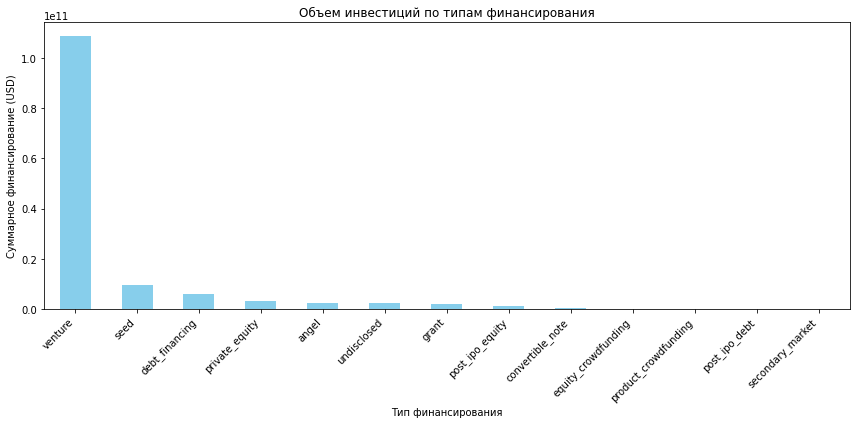

In [31]:
# Список столбцов с типами финансирования
funding_types = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding'
]

# 1. Посчитать сумму по каждому типу финансирования
# Приведем к числам
df_funding = df[funding_types].apply(pd.to_numeric, errors='coerce').fillna(0)

funding_sums = df_funding.sum().sort_values(ascending=False)

# 2. Построим столбчатую диаграмму
plt.figure(figsize=(12, 6))
funding_sums.plot(kind='bar', color='skyblue')

plt.title('Объем инвестиций по типам финансирования')
plt.ylabel('Суммарное финансирование (USD)')
plt.xlabel('Тип финансирования')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

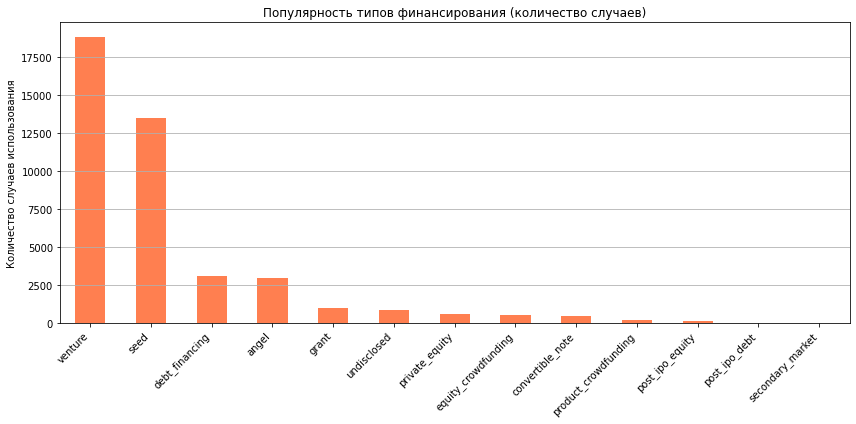

In [32]:
# 3. Посчитаем частоту использования: количество ненулевых (или ненулевых и не NaN) значений для каждого типа
usage_counts = df[funding_types].notnull() & (df[funding_types] != 0)
usage_counts = usage_counts.sum().sort_values(ascending=False)

# 4. Построим график популярности (частоты использования)
plt.figure(figsize=(12,6))
usage_counts.plot(kind='bar', color='coral')
plt.title('Популярность типов финансирования (количество случаев)')
plt.ylabel('Количество случаев использования')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

                      frequency  average_volume  freq_norm  vol_norm  \
seed                      13510    7.145552e+05   0.716910  0.024827   
venture                   18842    5.762152e+06   1.000000  0.726656   
debt_financing             3077    1.913353e+06   0.162994  0.191511   
angel                      2996    8.829075e+05   0.158694  0.048235   
grant                      1001    1.898338e+06   0.052774  0.189423   
undisclosed                 840    2.752904e+06   0.044226  0.308244   
private_equity              589    5.447463e+06   0.030900  0.682901   
equity_crowdfunding         520    5.359948e+05   0.027237  0.000000   
convertible_note            509    9.832635e+05   0.026653  0.062189   
product_crowdfunding        208    1.023729e+06   0.010672  0.067816   
post_ipo_equity             142    7.728064e+06   0.007168  1.000000   
post_ipo_debt                24    7.075379e+06   0.000903  0.909249   
secondary_market              7    6.469399e+06   0.000000  0.82

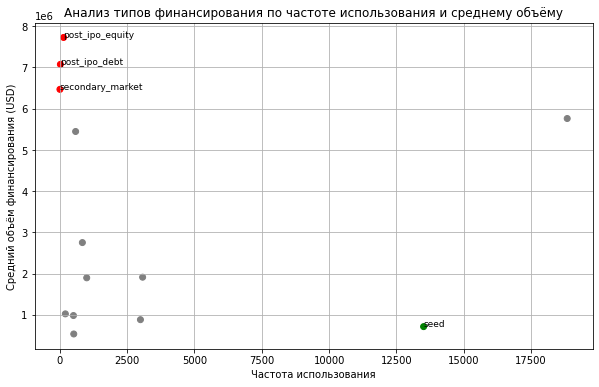

In [33]:

# Рассчитаем частоту использования (число компаний с ненулевым финансированием по типу)
frequency = (df[funding_types] > 0).sum()

# Рассчитаем средний объём финансирования для компаний, использующих каждый тип
# Для этого берем только значения больше 0 и считаем среднее
average_volume = {}
for ft in funding_types:
    nonzero_values = df.loc[df[ft] > 0, ft]
    average_volume[ft] = nonzero_values.mean() if len(nonzero_values) > 0 else 0

average_volume = pd.Series(average_volume)

# Объединим результаты в один DataFrame
analysis = pd.DataFrame({
    'frequency': frequency,
    'average_volume': average_volume
})

# Чтобы проще было выделить категории, можно нормализовать показатели (опционально)
analysis['freq_norm'] = (analysis['frequency'] - analysis['frequency'].min()) / (analysis['frequency'].max() - analysis['frequency'].min())
analysis['vol_norm'] = (analysis['average_volume'] - analysis['average_volume'].min()) / (analysis['average_volume'].max() - analysis['average_volume'].min())

# Добавим признаки для удобного выделения
# Часто используемые с малыми объемами: высокая freq_norm, низкая vol_norm
# Редко используемые с большими объемами: низкая freq_norm, высокая vol_norm

analysis['category'] = 'others'
analysis.loc[(analysis['freq_norm'] > 0.7) & (analysis['vol_norm'] < 0.3), 'category'] = 'frequent_small_volume'
analysis.loc[(analysis['freq_norm'] < 0.3) & (analysis['vol_norm'] > 0.7), 'category'] = 'rare_large_volume'

print(analysis.sort_values(by=['category', 'frequency'], ascending=[True, False]))

# Визуализация результатов для наглядности:
plt.figure(figsize=(10,6))
colors = analysis['category'].map({'frequent_small_volume':'green', 'rare_large_volume':'red', 'others':'grey'})

plt.scatter(analysis['frequency'], analysis['average_volume'], c=colors)
plt.xlabel('Частота использования')
plt.ylabel('Средний объём финансирования (USD)')
plt.title('Анализ типов финансирования по частоте использования и среднему объёму')

for i, row in analysis.iterrows():
    if row['category'] != 'others':
        plt.text(row['frequency'], row['average_volume'], i, fontsize=9)

plt.grid(True)
plt.show()

Постройте график суммарных объёмов возвратов от разных типов финансирования за весь период на основе дополнительного датасета.

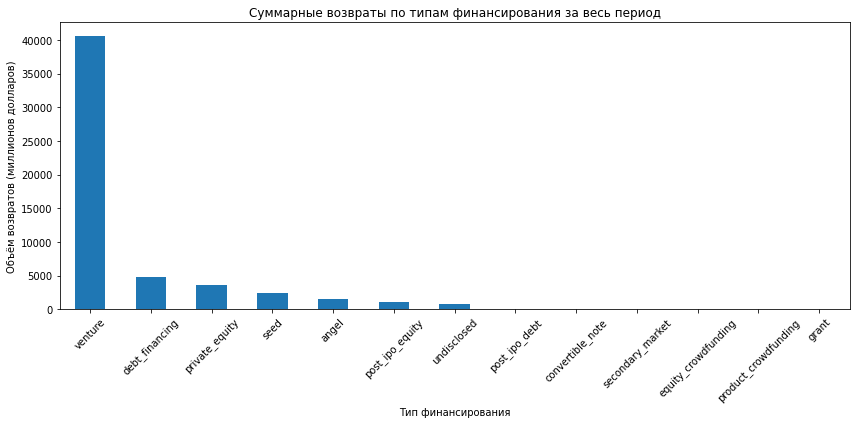

In [34]:
# Рассчитаем суммарные возвраты по каждому типу финансирования за весь период
total_returns = cb_returns_df[['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 
                            'convertible_note', 'debt_financing', 'angel', 'grant', 
                            'private_equity', 'post_ipo_equity', 'post_ipo_debt', 
                            'secondary_market', 'product_crowdfunding']].sum()

# Сортируем по убыванию для лучшей визуализации
total_returns = total_returns.sort_values(ascending=False)

# Построим столбчатый график
plt.figure(figsize=(12, 6))
total_returns.plot(kind='bar')
plt.title('Суммарные возвраты по типам финансирования за весь период')
plt.xlabel('Тип финансирования')
plt.ylabel('Объём возвратов (миллионов долларов)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Шаг 4. Анализ динамики

### 4.1 Динамика предоставления финансирования по годам

Используя столбцы `funding_total_usd` и `funding_rounds`, рассчитайте для каждой компании средний объём одного раунда финансирования.

На основе получившейся таблицы постройте графики, отражающие:
* динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования;

* динамику общего количества раундов за каждый год, то есть насколько активно происходили инвестиции на рынке (чем больше раундов, тем выше активность).

Когда будете строить графики в этом задании и следующих, используйте данные только по тем компаниям, которые остались в датасете после предыдущих фильтраций.

На основе полученных данных ответьте на вопросы:
* В каком году типичный размер средств, собранных в рамках одного раунда, был максимальным?

* Какая тенденция наблюдалась в 2014 году по количеству раундов и средств, выделяемых в рамках каждого раунда?

In [35]:
df['average_round_size'] = df['funding_total_usd'] / df['funding_rounds']
df_grouped = df.groupby('funding_year').agg(
    {'average_round_size': 'median', 'funding_rounds': 'sum'}
).reset_index()
df_grouped

,funding_year,average_round_size,funding_rounds
0,1921.0,1.000000e+03,1.0
1,1960.0,4.680150e+05,2.0
2,1979.0,1.000000e+06,1.0
3,1982.0,1.650000e+05,3.0
4,1983.0,9.400000e+04,1.0
5,1984.0,7.100000e+04,2.0
6,1985.0,2.430000e+05,3.0
7,1987.0,1.488000e+06,2.0
8,1989.0,1.500000e+04,1.0
9,1990.0,1.000000e+06,1.0


In [36]:
rounds_per_year = df.groupby('founded_year')['funding_rounds'].sum().reset_index()

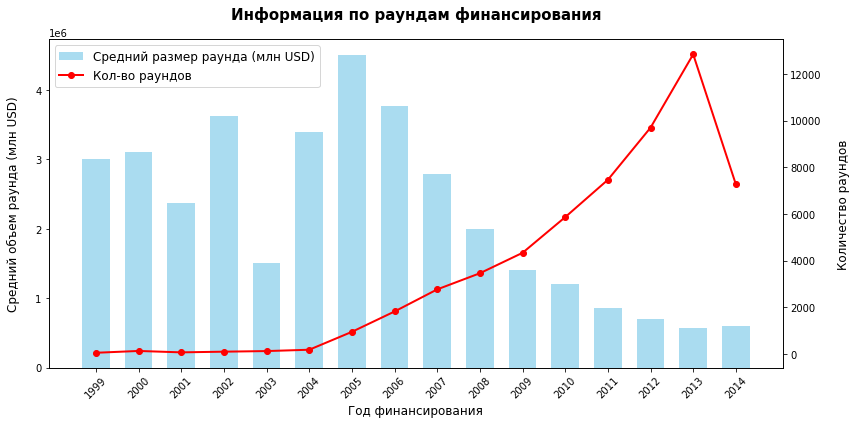

In [37]:

# Фильтруем данные по годам начиная с 1999
df_filtered = df_grouped[df_grouped['funding_year'] >= 1999]
years = df_filtered['funding_year']

fig, ax1 = plt.subplots(figsize=(12, 6))

# Барчарт среднего размера раунда
ax1.bar(
    years,
    df_filtered['average_round_size'],
    width=0.65,
    color='skyblue',
    label='Средний размер раунда (млн USD)',
    alpha=0.7
)

ax2 = ax1.twinx()

# Линейный график количества раундов
ax2.plot(
    years,
    df_filtered['funding_rounds'],
    color='red',
    marker='o',
    label='Кол-во раундов',
    linewidth=2
)

# Настройка осей
ax1.set_ylabel('Средний объем раунда (млн USD)', fontsize=12, labelpad=15)
ax1.set_xlabel('Год финансирования', fontsize=12)
ax1.set_xticks(years)
ax1.tick_params(axis='x', rotation=45)
ax2.set_ylabel('Количество раундов', fontsize=12, labelpad=15)

# Заголовок
plt.title('Информация по раундам финансирования', fontsize=15, fontweight='bold', pad=20)

# Легенда
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

Вывод: Средний денежный объем одного раунда был максимальным в 2005 году;
С 2005 года происходит отрицательная динамика в среднем объеме раунда, а кол-во раундов растет;
Максимальное кол-во раундов было достигнуто в 2013 году;
В 2014 году кол-во раундов и средний размер раунда ниже чем в 2013.

### 4.2 Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов

Составьте сводную таблицу, в которой указывается суммарный размер общего финансирования `funding_total_usd` по годам и сегментам рынка. Отберите из неё только те сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013.

На графике отразите, как менялся суммарный размер общего финансирования в каждом из отобранных сегментов по годам, за которые у вас достаточно данных. Рассматривайте только массовые сегменты, а средние и нишевые исключите.

На основе графика сделайте вывод о том, какие сегменты показывают наиболее быстрый и уверенный рост.

In [38]:
pivot_table = df.pivot_table(
    values='funding_total_usd',
    index='funding_year',
    columns='market',
    aggfunc='sum',
    fill_value=0
)
growth_segments = pivot_table.loc[2014] > pivot_table.loc[2013]
filtered_segments = pivot_table.columns[growth_segments]
filtered_pivot = pivot_table[filtered_segments]
massive_segments = filtered_pivot.columns[~filtered_pivot.columns.str.contains('Medium|Niche')]
final_pivot = filtered_pivot[massive_segments]
final_pivot

market,Apps,Internet,Medical,Nonprofits,Real Estate,SaaS,Sports,Startups,Technology,Video,mid,niche,unknown
funding_year,,,,,,,,,,,,,
1921.0,0,0,0,0,0,0,0,0,0,0,0,0,1000
1960.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1979.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1982.0,0,0,0,0,0,0,0,0,0,0,0,0,1044000
1983.0,0,0,0,0,0,0,0,0,0,0,0,0,94000
1984.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1985.0,0,0,0,0,0,0,0,0,0,0,0,0,1078000
1987.0,0,0,0,0,0,0,0,0,0,0,0,0,476000
1989.0,0,0,0,0,0,0,0,0,0,0,0,0,0


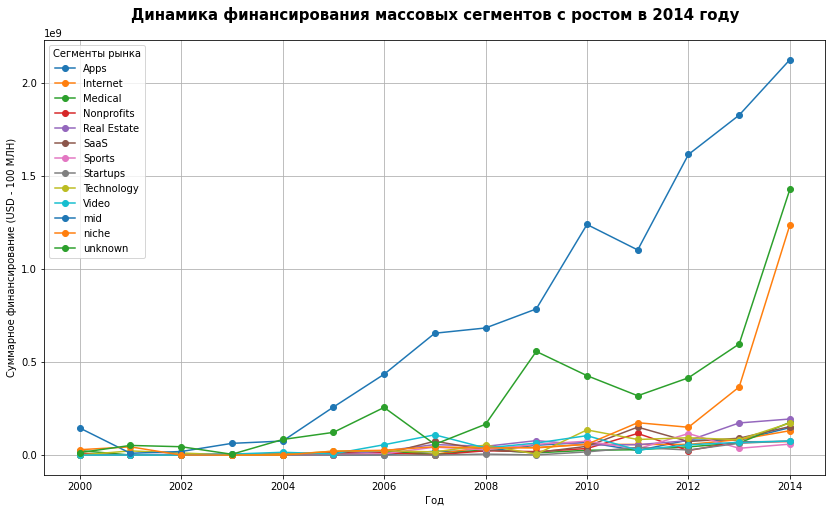

In [39]:

# Если индекс содержит годы, отфильтруем с 2000 года
final_pivot_filtered = final_pivot[final_pivot.index >= 2000]

# Построение графика
final_pivot_filtered.plot(
    kind='line',
    marker='o',
    figsize=(14, 8)
)

# Заголовок
plt.title(
    'Динамика финансирования массовых сегментов с ростом в 2014 году',
    fontsize=15,
    fontweight='bold',
    pad=20
)

# Метки осей
plt.xlabel('Год')
plt.ylabel('Суммарное финансирование (USD - 100 МЛН)')

# Включаем сетку
plt.grid(True)

# Легенда
plt.legend(title='Сегменты рынка', loc='best')

# Поворот отметок по оси X (если нужно)
plt.xticks(rotation=0)

# Показ графика
plt.show()

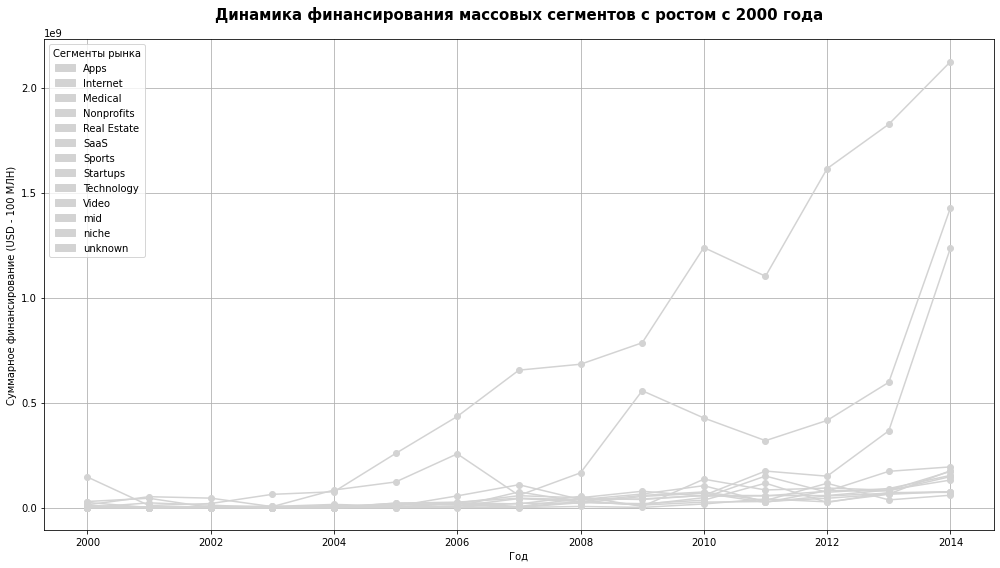

In [40]:

# Фильтруем данные с 2000 года
final_pivot_filtered = final_pivot[final_pivot.index >= 2000]

# Настройки цветов для сегментов
colors = {
    'medical devices': 'green',
    'financial services': 'orange',
    'technology': 'blue',
    'real estate': 'gray',
    'internet': 'purple',
    'medical': 'black',
}
other_color = '#D3D3D3'

# Создаем список цветов для каждого столбца
colors_list = [colors.get(col, other_color) for col in final_pivot_filtered.columns]

# Создаем патчи для легенды
legend_patches = [
    Patch(color=colors.get(segment, other_color), label=segment)
    for segment in final_pivot_filtered.columns
]

# Построение графика с разными цветами линий
final_pivot_filtered.plot(
    kind='line',
    marker='o',
    figsize=(14, 8),
    color=colors_list
)

# Заголовок и подписи
plt.title('Динамика финансирования массовых сегментов с ростом с 2000 года',
          fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Год')
plt.ylabel('Суммарное финансирование (USD - 100 МЛН)')
plt.grid(True)
plt.legend(handles=legend_patches, title='Сегменты рынка', loc='best')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 4.3 Годовая динамика доли возвращённых средств по типам финансирования

Заказчик хочет знать, какая часть вложенных или выданных денег со временем возвращается обратно инвесторам или финансистам. Ваша цель — для каждого года и каждого вида финансирования рассчитать нормированные значения возврата средств: то есть какую долю возвращённые средства составляют от предоставленных. При этом слишком большие аномальные значения, то есть неадекватные выбросы, нужно заменить на пропуски.

Совет: когда будете делить сумму возвращённых средств на суммарный объём привлечённого финансирования по конкретному году, добавьте к знаменателю небольшое число, например `1e-60`. Это поможет избежать деления на ноль.

In [41]:
investment_types = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding'
]

# --- 1. Подготовка cb_returns_df ---

# Установим индекс 'year', если ещё не сделано
if cb_returns_df.index.name != 'year':
    cb_returns_df = cb_returns_df.set_index('year')

# Фильтруем cb_returns_df по годам >= 2000
cb_returns_df = cb_returns_df[cb_returns_df.index >= 2000]

# --- 2. Подготовка final_df ---

# Предполагается, что final_df содержит колонку 'funding_year' с годом инвестиций
# Фильтруем по funding_year >= 2000
final_df = df[df['funding_year'] >= 2000]

# Группируем вложения по году
investments_grouped = df.groupby('funding_year')[investment_types].sum()

# --- 3. Масштабируем возвраты ---
returns_df = cb_returns_df * 1_000_000  # привести к нужным единицам

# --- 4. Объединяем данные по годам ---
merged_df = pd.merge(
    investments_grouped,
    returns_df,
    left_index=True,
    right_index=True,
    how='outer',
    suffixes=('_x', '_y')
)
# --- 5. Вычисление нормализованных возвратов ---
def calculate_normalized_returns(df):
    for fund_type in investment_types:
        col_invest = fund_type + '_x'
        col_return = fund_type + '_y'
        col_ratio = fund_type + '_return_ratio'

        if col_invest in df.columns and col_return in df.columns:
            ratio = df[col_return] / (df[col_invest] + 1e-60)  # защищаем от деления на 0
            ratio = ratio.where(ratio <= 10, np.nan)  # ограничиваем максимум 10
            df[col_ratio] = ratio
        else:
            df[col_ratio] = np.nan
    return df

result_df = calculate_normalized_returns(merged_df)

# --- 6. Фильтрация финального результата по годам >= 2000 ---
result_df = result_df[result_df.index >= 2000]

# --- 7. Просмотр результата ---
display(result_df.head())

NameError: name 'np' is not defined

In [ ]:
# Список типов финансирования
funding_types = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 
                 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 
                 'product_crowdfunding']

# Группировка данных по году основания ('founded_year') и суммирование по типам финансирования
investment_yearly = df.groupby('founded_year')[funding_types].sum().reset_index()

# Переименование колонки 'founded_year' в 'year' для удобства объединения
investment_yearly.rename(columns={'founded_year': 'year'}, inplace=True)

# Объединение инвестиционных данных с возвратами по году
merged = pd.merge(cb_returns_df, investment_yearly, on='year', how='outer', suffixes=('_returns', '_investments'))

# Заполняем пропуски нулями
for ftype in funding_types:
    merged[f'{ftype}_returns'] = merged[f'{ftype}_returns'].fillna(0)
    merged[f'{ftype}_investments'] = merged[f'{ftype}_investments'].fillna(0)

# Расчет нормированных возвратов
for ftype in funding_types:
    merged[f'{ftype}_norm_return'] = merged[f'{ftype}_returns'] / (merged[f'{ftype}_investments'] + 1e-60)

# Обработка выбросов: исключение значений с более чем 300% возвратом
threshold = 3
for ftype in funding_types:
    col = f'{ftype}_norm_return'
    merged.loc[merged[col] > threshold, col] = np.nan

# Отфильтруем данные так, чтобы в итоговом датафрейме были только годы >= 2000
merged = merged[merged['year'] >= 2002]

# Итоговый датафрейм с нормированными возвратами
norm_returns_df = merged[['year'] + [f'{f}_norm_return' for f in funding_types]]

# Проверка первых строк
display(norm_returns_df.head())

In [ ]:
def replace_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Создаем новую серию, заменяя выбросы на NaN
    result_series = series.copy()
    result_series.loc[(result_series < lower_bound) | (result_series > upper_bound)] = np.nan
    
    return result_series

Постройте график, на котором отобразите нормированные значения возврата средств для типов финансирования `venture`, `debt_financing`, `private_equity`, `seed` и `angel`.

Сделайте вывод о том, в каких типах финансирования наблюдается наиболее устойчивый рост показателя.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# --- Используем norm_returns_df после всех расчётов ---

# Установка индекса 'year', если еще не установлен
if norm_returns_df.index.name != 'year' and 'year' in norm_returns_df.columns:
    norm_returns_df = norm_returns_df.set_index('year')

# Фильтрация по годам >= 2000
filtered_df = norm_returns_df.loc[norm_returns_df.index >= 2000]

# Выбираем интересующие виды финансирования (обратите внимание на суффикс '_norm_return')
selected_types = ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']
selected_cols = [f'{ftype}_norm_return' for ftype in selected_types]

# Создаём подтаблицу для выбранных типов
subset_df = filtered_df[selected_cols]

# Построение графика
plt.figure(figsize=(12, 6))

for ftype, col in zip(selected_types, selected_cols):
    plt.plot(
        subset_df.index,
        subset_df[col],
        label=ftype.capitalize(),
        marker='o'
    )

plt.title('Нормированные значения возврата по типам финансирования')
plt.xlabel('Год')
plt.ylabel('Доля возврата (%)')

# Форматирование оси Y — проценты
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Шаг 5. Итоговый вывод и рекомендации

Представьте, что на календаре 2015 год. Опираясь на результаты анализа, дайте рекомендацию заказчику:

* в какую отрасль стоит инвестировать;
* какой тип финансирования при этом будет наиболее уместным.

Подведите итоги проекта:
* опишите, какие шаги были выполнены;
* какие выводы удалось сделать;
* насколько выводы согласуются между собой или, наоборот, вызывают сомнения.

